In [1]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.utils.image_utils import load_img
from keras.utils.image_utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator # load the image
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import glob
from skimage import io
import os
from scipy.signal import convolve2d
from PIL import Image  
import PIL 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
import xml.etree.ElementTree as ET # copy of xml
import cv2
import os

In [2]:
def convert(img):
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    return samples

In [3]:
def picture_zoom(image,imagename):
   # create image data augmentation generator
    datagen_zoom= ImageDataGenerator(zoom_range=[0.8,1.5])

    # prepare iterator
    it_zoom = datagen_zoom.flow(image, batch_size=1)

    # generate batch of images
    batch_zoom = it_zoom.next()
    
    # convert to unsigned integers for viewing
    image_zoom = batch_zoom[0].astype('uint64')
    
    # plot raw pixel 
    img_zoom=plt.imshow(image_zoom, interpolation ='None', filternorm=True) #spline36, antialiased
      
    #save new picture
    img_zoom.figure.savefig("C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//Augmentation//Zoom"+imagename+".png")
    
def file_zoom(file,filename):
    
    # create of Zoom xml file   
     file.write("C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//annotations//Zoom"+filename+".xml")

In [4]:
def picture_rotation(image,imagename):
   
    # ImageDataGenerator rotation
    datagen_rotation=ImageDataGenerator(rotation_range=30, fill_mode='nearest')

    # prepare iterator
    it_rotation = datagen_rotation.flow(image, batch_size=1)

    # generate batch of images
    batch_rotation = it_rotation.next()
    
    # convert to unsigned integers for viewing
    image_rotation = batch_rotation[0].astype('uint64')
    
    # plot raw pixel 
    img_rotation=plt.imshow(image_rotation, interpolation ='None', filternorm=True) #spline36, antialiased

    #save new picture
    img_rotation.figure.savefig("C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//Augmentation//Rotation"+imagename+".png")

def file_rotation(file,filename):
    
    # create of brightness xml file   
     file.write("C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//annotations//Rotation"+filename+".xml")

In [5]:
def picture_brightness(image,imagename):
   
    # create image data augmentation generator
    datagen_brightness = ImageDataGenerator(brightness_range=[0.2,1.0])

    # prepare iterator
    it_brightness = datagen_brightness.flow(image, batch_size=1)
    
    # generate batch of images
    batch_zoom = it_brightness.next()
    
    # convert to unsigned integers for viewing
    image_brightness = batch_zoom[0].astype('uint64')
    
    # plot raw pixel 
    img_brightness=plt.imshow(image_brightness, interpolation ='None')
    
    #save new picture
    img_brightness.figure.savefig("C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//Augmentation//Brightness"+imagename+".png")
    
def file_brightness(file,filename):
    
    # create of brightness xml file   
     file.write("C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//annotations//Brightness"+filename+".xml")   

In [6]:
def load_images_from_folder(folder_image):
    for imagename in os.listdir(folder_image):
        
         #read the image       
        image = cv2.imread(os.path.join(folder_image,imagename))
        image_true_color = cv2.cvtColor(image, cv2.COLOR_RGBA2BGRA)
        
        img= convert(image_true_color)
        
        #call each seperate function
        picture_zoom(img,imagename)
        picture_brightness(img,imagename)
        picture_rotation(img,imagename)
           
        #Destroyed all window we created earlier.
        cv2.destroyAllWindows()
        
def load_files_from_folder(folder_file):
    for filename in os.listdir(folder_file):
        
        #read the file
        file = ET.parse(os.path.join(folder_file,filename))

         #call each seperate function
        file_zoom(file,filename)    
        file_brightness(file,filename)
        file_rotation(file,filename)

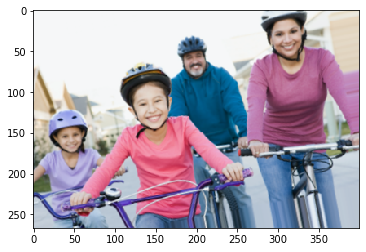

In [7]:
folder_image= r"C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//ima"
folder_file=r"C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//annotations"
 
load_images_from_folder(folder_image)
load_files_from_folder(folder_file)

        ################################ testing #########################################

In [8]:
# def picture_rotation(image,NumberOfPicture):
   
#     # ImageDataGenerator rotation
#     datagen_rotation=ImageDataGenerator(rotation_range=30, fill_mode='nearest')

#     # prepare iterator
#     it_rotation = datagen_rotation.flow(image, batch_size=1)

#     # generate batch of images
#     batch_rotation = it_rotation.next()
    
#     # convert to unsigned integers for viewing
#     image_rotation = batch_rotation[0].astype('uint64')
    
#     # plot raw pixel 
#     img_rotation=plt.imshow(image_rotation, interpolation ='None', filternorm=True) #spline36, antialiased
#     img_rotation.figure.savefig("C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//Augmentation//FaceBikesHelmetRotation"+str(NumberOfPicture)+".png")

# def file_rotation(file):
    
#     # create of Rotation xml file   
#     file.write("C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//annotations//BikesHelmets"+str(i)+'Rotation.xml')